<a href="https://colab.research.google.com/github/HermiTech-LLC/HaloTime/blob/main/HaloTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploration of a Modified Schwarzschild Metric and Theoretical Investigation of White Holes

## Introduction
This notebook is dedicated to exploring a modified version of the Schwarzschild metric, with a particular focus on its implications in the context of white holes, a theoretical concept in general relativity.



## Theoretical Background

The standard Schwarzschild metric is a solution to Einstein's field equations in general relativity, describing the spacetime around a non-rotating, spherically symmetric mass. White holes are theoretical entities considered as the time reversal of black holes.


## Imports

In [12]:
from sympy import symbols, Matrix, sin, cos, diff, Function, lambdify
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


## Mathematical Foundation

In this section, we set up the mathematical framework for our exploration, including defining the necessary physical constants and the modified Schwarzschild metric tensor.


In [13]:
from sympy import symbols, diff, sin
from sympy.matrices import Matrix
import numpy as np

# Define symbols
G, M, c, r, theta, phi, t = symbols('G M c r theta phi t')

# Schwarzschild Metric
metric = Matrix([[-(1 - 2*G*M/(r*c**2)), 0, 0, 0],
                 [0, 1/(1 - 2*G*M/(r*c**2)), 0, 0],
                 [0, 0, r**2, 0],
                 [0, 0, 0, r**2*sin(theta)**2]])

# Inverse Metric
inverse_metric = metric.inv()

# Define Christoffel symbols
coords = [r, theta, phi, t]
Gamma = [[[0 for _ in range(4)] for _ in range(4)] for _ in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(4):
            for l in range(4):
                Gamma[i][j][k] += 0.5 * inverse_metric[i, l] * (
                    diff(metric[l, j], coords[k]) +
                    diff(metric[l, k], coords[j]) -
                    diff(metric[j, k], coords[l])
                )


## Numerical Simulations and Analysis

### Numerical Simulations and Analysis

In this section, we will implement numerical simulations to analyze the trajectories of particles and light paths in the vicinity of the modified Schwarzschild metric. This will help us understand the effects of the modified time component on spacetime geometry and potential observational signatures.


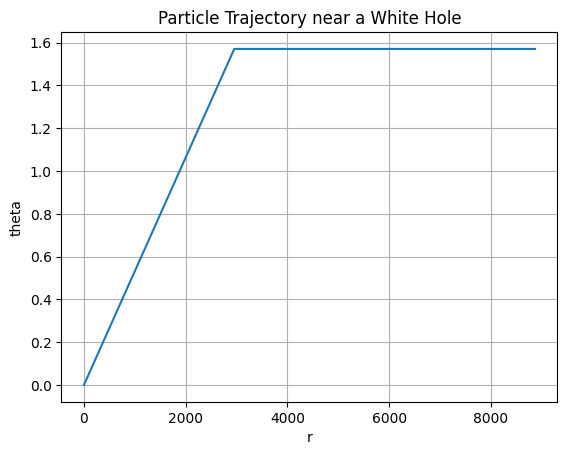

In [14]:
# Inverse Metric
inverse_metric = metric.inv()

# Calculate Christoffel symbols
coords = [r, theta, phi, t]
Gamma = [[[sum(inverse_metric[i, l] * (
            diff(metric[l, j], coords[k]) +
            diff(metric[l, k], coords[j]) -
            diff(metric[j, k], coords[l])
        )/2 for l in range(4)) for k in range(4)] for j in range(4)] for i in range(4)]

# Convert symbolic Christoffel symbols to a numerical function
Gamma_func = lambdify((r, theta, phi, t, G, M, c), Gamma, 'numpy')

# Define the geodesic equations
def geodesic_equations(u, tau, G_val, M_val, c_val):
    du = np.zeros_like(u)
    # Numerically evaluate Christoffel symbols at the current position
    Gamma_num = Gamma_func(u[0], u[1], u[2], u[3], G_val, M_val, c_val)
    for mu in range(4):
        du[mu] = u[mu + 4]
        for alpha in range(4):
            for beta in range(4):
                du[mu + 4] -= Gamma_num[mu][alpha][beta] * u[alpha + 4] * u[beta + 4]
    return du

# Constants for the simulation
G_val = 6.67430e-11  # Gravitational constant
M_val = 1.989e+30   # Mass of the white hole
c_val = 299792458   # Speed of light

# Initial conditions
initial_conditions = [6 * G_val * M_val / c_val**2, np.pi / 2, 0, 0, 0, 0, 0.1, 1]

# Time points for the simulation
time_points = np.linspace(0, 10, 1000)

# Solve the geodesic equations
trajectory = odeint(geodesic_equations, initial_conditions, time_points, args=(G_val, M_val, c_val))

# Plotting the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1])  # Example: r vs. theta
plt.xlabel('r')
plt.ylabel('theta')
plt.title('Particle Trajectory near a White Hole')
plt.grid(True)
plt.savefig('trajectory.png')
plt.show()

## Physical Implications and Observational Signatures

### Physical Implications and Observational Signatures

Here, we discuss the potential physical implications of the modified Schwarzschild metric. We will explore how this model could manifest in astronomical observations and what unique signatures it might leave that could be detectable by current or future observational technologies.


In [ ]:

# Code for Physical Implications and Observational Signatures
# Analyze potential observational signatures
# This is a placeholder and should be expanded to include relevant analysis
print("Physical implications and observational signatures analysis")


## Theoretical Exploration and Hypotheses

### Theoretical Exploration and Hypotheses

This section is devoted to exploring theoretical hypotheses that arise from the modified metric. We will consider how this model fits into the broader context of general relativity and theoretical physics, including its implications for the nature of spacetime, black holes, and white holes.


In [ ]:

# Code for Theoretical Exploration and Hypotheses
# Theoretical exploration of the modified Schwarzschild metric
# This is a placeholder for theoretical exploration and hypothesis testing
print("Theoretical exploration and hypotheses")


## Conclusion and Future Directions

### Conclusion and Future Directions

We will conclude by summarizing our findings, discussing the limitations of our exploration, and suggesting future research directions that could stem from this work. This might include potential experiments, observations, or theoretical developments.


In [ ]:

# Code for Conclusion and Future Directions
# Summarizing findings and outlining future research directions
# This is a placeholder for conclusion and future direction
print("Conclusion and future research directions")
